Example of usage of SNS: 2D Gaussian Distribution

In [5]:
import sns
import numpy as np

from scipy.stats import multivariate_normal
from getdist import plots

/Users/Pablo/Code/SNS/sns.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  min_sample['weights'] = self.get_weight()


0 completed, logZ = -28.843546964080662 , epsilon = 289069324290.0607
100 completed, logZ = -6.1288457868244794 , epsilon = 9.61274955894742
200 completed, logZ = -4.592951244885968 , epsilon = 0.28015183572165375


---------------------------------------------
Nested Sampling completed
Run time = 11.320764780044556 seconds
Acceptance rate = 0.036954087346024636
logZ = -4.425786938359793 +/- 0.43891113243253843
---------------------------------------------
True logZ =  -4.605170185988091
Removed no burn in


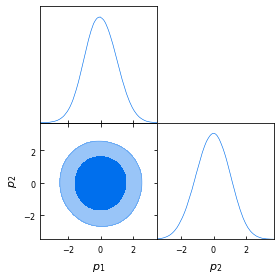

In [6]:
def get_loglike(theta):
  return multivariate_normal.logpdf(theta, mean=(0,0), cov=np.identity(2))

p1 = sns.Param(
    name = 'p1', 
    prior_type = 'Uniform', 
    prior = [-5,5], 
    label = 'p_1')
p2 = sns.Param(
    name = 'p2', 
    prior_type = 'Uniform', 
    prior = [-5,5], 
    label = 'p_2')

params = [p1,p2]

ns = sns.NestedSampler(
    nlive = 50, 
    loglike = get_loglike, 
    params = params)

ns.run()

# The true logZ is the inverse of the prior volume
print('True logZ = ', np.log(1/100.))

samples = ns.convert_to_getdist()
g = plots.get_subplot_plotter()
g.triangle_plot(samples, filled=True)

In [8]:
# To save the chains

#path = '/chains/test'
#samples.saveAsText(path)